# MatplotLib Homework

### Summary:
This jupyter notebook uses Matplotlib and Pandas to compare and analyze a fictitious study conducted by Pymaceuticals Inc.
In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. 
This notebook compares the performance of Pymaceutical's drug of interest, Capomulin, versus various other treatment regimens.

### Observations:
1. There is a strong correlation between the weight of the mouse and its tumor volume.
2. Ramicane was the most effective drug treatment, followed closely by Capomulin
3. Between the 4 most promising drug regimens(Capomulin, Ramicane, Infubinol, and Ceftamin), Infubinol is the only regimen that contained an outlier

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID")
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group Data by Drug Regimen
merged_df = merged_data.groupby(["Drug Regimen"])

#set tumor volume variable
tumor_vol = merged_df["Tumor Volume (mm3)"]

#run statistical calculations on tumor volume variable
mean_vol = tumor_vol.mean()
median_vol = tumor_vol.median()
var_vol = tumor_vol.var()
std_vol = tumor_vol.std()
sem_vol = tumor_vol.sem()
total_vol = tumor_vol.sum()

#Create summary table
summary_table = pd.DataFrame({
                "Mean Tumor Volume": mean_vol,
                "Median Tumor Volume": median_vol,
                "Tumor Volume Variance": var_vol,
                "Tumor Volume Std. Dev.": std_vol,
                "Tumor Volume Std. Err": sem_vol
                })

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

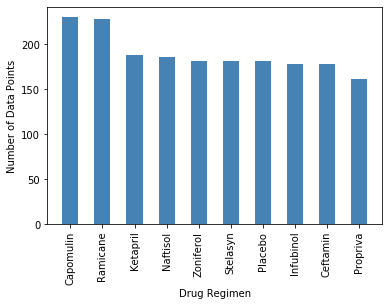

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts_per_treatment = tumor_vol.count()

#Sort this series descending
counts_per_treatment.sort_values(ascending = False, inplace = True)

#Grab names of treatments
treatment_names = counts_per_treatment.index

#Set length of x-axis
x_axis = np.arange(len(counts_per_treatment))

#Plot bar chart
plt.bar(x_axis, counts_per_treatment, color = 'steelblue', alpha = 1, align = 'center', width = 0.5)

#Set tick locations
tick_locations = [value for value in x_axis]

#set xlabels
plt.xticks(tick_locations, treatment_names, rotation = 90)

#add chart labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")



Text(0, 0.5, 'Number of Data Points')

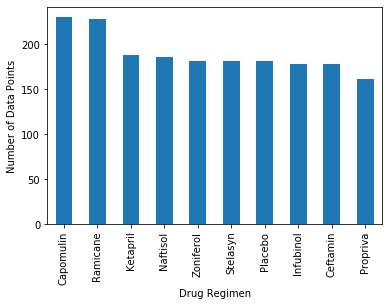

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

count_chart = counts_per_treatment.plot(kind = "bar")

#set ylabel
count_chart.set_ylabel("Number of Data Points")




Text(0, 0.5, 'Sex')

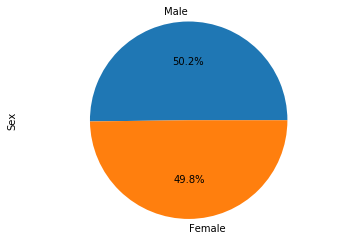

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Group Data by Drug Regimen
gender_df = mouse_metadata.groupby(["Sex"])

#grab gender counts
gender_counts= gender_df["Sex"].count()

#sort gender counts
gender_counts.sort_values(ascending = False, inplace = True)

#add labels
labels = ["Male", "Female"]

#plot pie chart
plt.pie(gender_counts, labels = labels, autopct = "%1.1f%%")

#Create equal axes so we have a perfect circle
plt.axis("equal")

#add ylabel
plt.ylabel("Sex")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000213AD245048>],
      dtype=object)

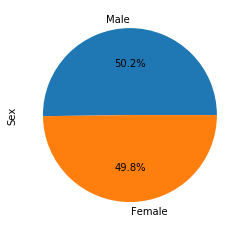

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts.plot(kind = "pie", labels = labels, subplots = True, autopct = "%1.1f%%" )


In [8]:
#group by mouse ID
mouse_grouping = merged_data.groupby("Mouse ID").max()

#calculate max timepoint for each mouse
max_timepoint = mouse_grouping.iloc[:,0:1]
max_timepoint = max_timepoint.rename(columns = {"Timepoint": "Max_Timepoint"})

#merge the max timepoint to original merged data
final_merged = pd.merge(merged_data, max_timepoint, on = "Mouse ID")

final_merged




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,45
1889,m601,30,31.758275,1,Capomulin,Male,22,17,45
1890,m601,35,30.834357,1,Capomulin,Male,22,17,45
1891,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#filter data where timepoint equals the max timepoint
filtered_data = final_merged.loc[final_merged["Timepoint"] == final_merged["Max_Timepoint"], :]

#group by drug regimen and mouse id
tumor_df = filtered_data.groupby(["Drug Regimen", "Mouse ID"])

tumor_df = tumor_df["Tumor Volume (mm3)"].sum()

#generate dataframes
cap_df = tumor_df.loc["Capomulin"]
ram_df = tumor_df.loc["Ramicane"]
inf_df = tumor_df.loc["Infubinol"]
cef_df = tumor_df.loc["Ceftamin"]

#generate lists
cap = tumor_df.loc["Capomulin"].to_list()
ram = tumor_df.loc["Ramicane"].to_list()
inf = tumor_df.loc["Infubinol"].to_list()
cef = tumor_df.loc["Ceftamin"].to_list()

#Generate list of regimens to plot
plot_data = [cap, ram, inf, cef]

#Show list titles
list_titles = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Create Function to calculate quartiles and IQR. Returns a list containing lower and upper bounds
def calc_quartiles(x, name):
    quartiles = x.quantile([.25,.5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{name} Summary: \n Lower Quartile: {lowerq}, Upper Quartile: {upperq}, IQR: {iqr} \n Lower Bound: {lower_bound}, Upper Bound: {upper_bound} \n")    
    
    return [lower_bound, upper_bound]

#call function for each drug
cap_bounds = calc_quartiles(cap_df, "Capomulin")
ram_bounds = calc_quartiles(ram_df, "Ramicane")
inf_bounds = calc_quartiles(inf_df, "Infubinol")
cef_bounds = calc_quartiles(cef_df, "Ceftamin")

#create empty lists to capture any potential outliers
cap_outliers = []
ram_outliers = []
inf_outliers = []
cef_outliers = []

#This function loops through the treatment lists and compares it to the upper and lower bounds. 
#If any outliers exists, they are appended to outlier list
#The function then prints the outliers if they exist
def check_outliers(values, bounds, outliers, name):
    for x in values:
        if x < bounds[0]:
            outliers.append(x)
        elif x > bounds[1]:
            outliers.append(x)
    
    #if list is empty, print it has no outliers. Otherwise, list outliers
    if len(outliers) == 0:
        print(f"{name} has no outliers!")
    else:
        print(f"{name} has the following outliers: {outliers}")     

# #check for outliers for each treatment
check_outliers(cap, cap_bounds, cap_outliers, "Capomulin")
check_outliers(ram, ram_bounds, ram_outliers, "Ramicane")
check_outliers(inf, inf_bounds, inf_outliers, "Infubinol")
check_outliers(cef, cef_bounds, cef_outliers, "Ceftamin")



Capomulin Summary: 
 Lower Quartile: 32.37735684, Upper Quartile: 40.1592203, IQR: 7.781863460000004 
 Lower Bound: 20.70456164999999, Upper Bound: 51.83201549 

Ramicane Summary: 
 Lower Quartile: 31.56046955, Upper Quartile: 40.65900627, IQR: 9.098536719999998 
 Lower Bound: 17.912664470000003, Upper Bound: 54.30681135 

Infubinol Summary: 
 Lower Quartile: 54.04860769, Upper Quartile: 65.52574285, IQR: 11.477135160000003 
 Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001 

Ceftamin Summary: 
 Lower Quartile: 48.72207785, Upper Quartile: 64.29983003, IQR: 15.577752179999997 
 Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999 

Capomulin has no outliers!
Ramicane has no outliers!
Infubinol has the following outliers: [36.321345799999996]
Ceftamin has no outliers!


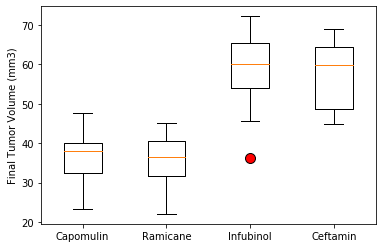

In [10]:
#Plot regimens with box plot....
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(list_titles)

outlier_style = dict(marker='o', markerfacecolor='r', markersize=10)
    
ax1.boxplot(plot_data, flierprops = outlier_style)
plt.show()

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

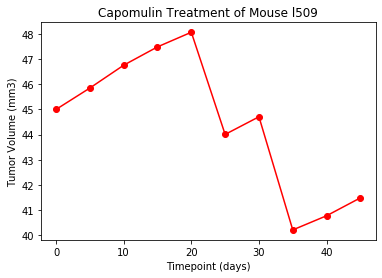

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

filtered_mouse = study_results.loc[study_results["Mouse ID"] == "l509"]

time_list = filtered_mouse["Timepoint"]
tumor_list = filtered_mouse["Tumor Volume (mm3)"]

x = plt.plot(time_list, tumor_list, marker = "o", color = "red")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

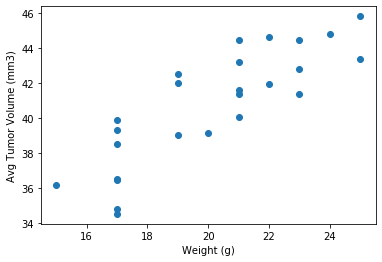

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_filter = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capomulin_filter = capomulin_filter.groupby("Mouse ID")
capomulin_filter.mean()

avg_vol = capomulin_filter["Tumor Volume (mm3)"].mean()
weight = capomulin_filter["Weight (g)"].mean()

plt.scatter(weight, avg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

The correlation between mouse weight and the average tumor volume is 0.84.


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

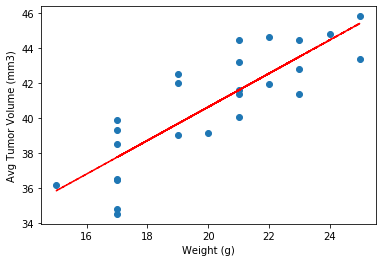

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, avg_vol)

vc_fit = vc_slope * weight + vc_int

plt.scatter(weight, avg_vol)
plt.plot(weight, vc_fit, "--", color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")